# Atividade - Exploração e Análise Inicial de Dados Reais

> ### Mari, somente recortei os pedaços e coloquei aqui para que você consiga visualizar melhor a saida de cada etapa do código, para visualizar os comentários e outras coisas, abre o .py

> Aqui os gráficos são só exibidos, no .py eles são salvos na pasta "graficos"

## Bibliotecas e import do dataset:

In [2]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Seção 1:
# Seção de Importação Inicial

path = 'academic_stress_level-maintainance_1.csv'
df = pd.read_csv(path)

## Visualização e análise preliminar do dataset:

In [3]:
# Seção 2:
# Visualização inicial dos dados:

print("\n", "---"*15, "\n")
print(df.head())
print("\n", "---"*15, "\n")

# Seção 3:
# Análise Preliminar:

print("\n", "---"*15, "\n")
print(df.info())
print("\n", "---"*15, "\n")


 --------------------------------------------- 

             Timestamp Your Academic Stage  Peer pressure  \
0  24/07/2025 22:05:39       undergraduate              4   
1  24/07/2025 22:05:52       undergraduate              3   
2  24/07/2025 22:06:39       undergraduate              1   
3  24/07/2025 22:06:45       undergraduate              3   
4  24/07/2025 22:08:06       undergraduate              3   

   Academic pressure from your home Study Environment  \
0                                 5             Noisy   
1                                 4          Peaceful   
2                                 1          Peaceful   
3                                 2          Peaceful   
4                                 3          Peaceful   

          What coping strategy you use as a student?  \
0  Analyze the situation and handle it with intel...   
1  Analyze the situation and handle it with intel...   
2                   Social support (friends, family)   
3  Analyze the s

## Tratamento de dados:

In [4]:
# Seção 4:
# Tratamento dos dados:

df_tratado = df.dropna() # Limpa valores nulos

df_tratado_1 = df_tratado.rename(columns={ # Renomeia colunas

    'Timestamp': 'timestamp',
    'Your Academic Stage': 'academic_stage', # Em uso
    'Peer pressure': 'pressure_schoolmates', 
    'Academic pressure from your home': 'pressure_family',
    'Study Environment': 'study_environment', # Em uso
    'What coping strategy you use as a student?': 'coping_strategy', 
    'Do you have any bad habits like smoking, drinking on a daily basis?': 'bad_habits',
    'What would you rate the academic  competition in your student life': 'academic_competition', # Em uso
    'Rate your academic stress index ': 'stress' # Em uso
    #'': '',
})

# Removendo as colunas inutilizadas na minha analise.

df_final = df_tratado_1.drop(['timestamp', 'pressure_schoolmates', 'pressure_family', 'coping_strategy', 'bad_habits'], axis=1)

# Confirmação do tratamento:

print("\n", "---"*15, "\n")
print("APÓS A REALIZAÇÃO DO TRATAMENTO: ")
print("\n", "---"*15, "\n")
print(df_final.info())
print("\n", "---"*15, "\n")


 --------------------------------------------- 

APÓS A REALIZAÇÃO DO TRATAMENTO: 

 --------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 139
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   academic_stage        139 non-null    object
 1   study_environment     139 non-null    object
 2   academic_competition  139 non-null    int64 
 3   stress                139 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.4+ KB
None

 --------------------------------------------- 



## Calculo de tendencia central e dispersão:
> ### Análise 1:

In [5]:
# Seção 5:
# Seção 5.1:
# Análise 1:
# Objetivo: Avaliar nível de estresse acadêmico relatado, por nível acadêmico, através de análise analítica
# Saida esperada: Vou montar um gráfico de colunas sobre o nível de estresse relatado por cada nível acadêmico e sua distribuição, e além disso um gráfico mostrando a média de cada área.

# Seção 5.1.1 - Analises de tendencia central e dispersão
# Inicialmente, iremos realizar somente os cálculos filtrados por níveis acadêmicos:

media_estresse_nivel_academico = df_final.groupby('academic_stage')[['stress']].mean()
moda_estresse_nivel_academico = df_final.groupby('academic_stage')['stress'].apply(lambda x: x.mode()[0])
mediana_estresse_nivel_academico = df_final.groupby('academic_stage')[['stress']].median()
variancia_estresse_nivel_academico = df_final.groupby('academic_stage')[['stress']].var()
desvio_padrao_estresse_nivel_academico = df_final.groupby('academic_stage')[['stress']].std()
amplitude_estresse_nivel_academico = ( df_final.groupby('academic_stage')[['stress']].max() - df_final.groupby('academic_stage')[['stress']].min() )


## Exibição dos resultados:

In [6]:
# Exibindo os dados:

print("\n", "---"*15, "\n")
print(f"A média de estresse por nível acadêmico é: \n\n{media_estresse_nivel_academico}")
print("\n", "---"*15, "\n")
print(f"A moda de estresse por nível acadêmico é: \n\n{moda_estresse_nivel_academico}")
print("\n", "---"*15, "\n")
print(f"A mediana de estresse por nível acadêmico é: \n\n{mediana_estresse_nivel_academico}")
print("\n", "---"*15, "\n")
print(f"A variância de estresse por nível acadêmico é: \n\n{variancia_estresse_nivel_academico}")
print("\n", "---"*15, "\n")
print(f"O desvio padrão de estresse por nível acadêmico é: \n\n{desvio_padrao_estresse_nivel_academico}")
print("\n", "---"*15, "\n")
print(f"A amplitude de estresse por nível acadêmico é: \n\n{amplitude_estresse_nivel_academico}")
print("\n", "---"*15, "\n")


 --------------------------------------------- 

A média de estresse por nível acadêmico é: 

                  stress
academic_stage          
high school     3.827586
post-graduate   3.727273
undergraduate   3.686869

 --------------------------------------------- 

A moda de estresse por nível acadêmico é: 

academic_stage
high school      4
post-graduate    4
undergraduate    4
Name: stress, dtype: int64

 --------------------------------------------- 

A mediana de estresse por nível acadêmico é: 

                stress
academic_stage        
high school        4.0
post-graduate      4.0
undergraduate      4.0

 --------------------------------------------- 

A variância de estresse por nível acadêmico é: 

                  stress
academic_stage          
high school     1.290640
post-graduate   0.418182
undergraduate   1.094826

 --------------------------------------------- 

O desvio padrão de estresse por nível acadêmico é: 

                  stress
academic_stage         

## Graficos:
> ### Análise 1

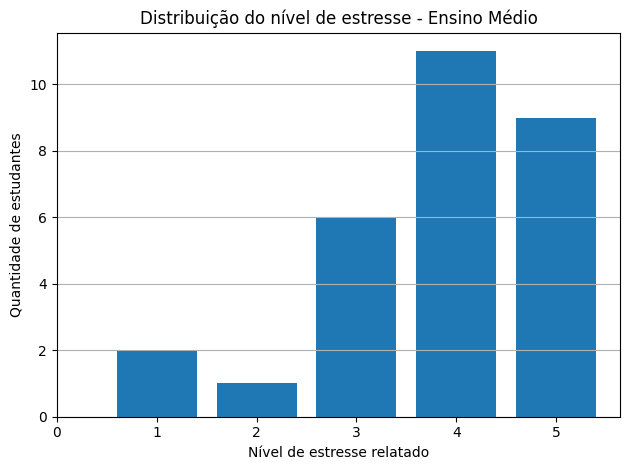

<Figure size 640x480 with 0 Axes>

In [8]:
# Seção 5.1.2 - Gráficos por nível acadêmico

# Seção 5.1.2.1 - HIGH-SCHOOL

# Filtramos pelo ensino médio
estresse_highschool = df_final[df_final['academic_stage'] == 'high school']['stress'].value_counts().sort_index()

# Gráfico
plt.bar(estresse_highschool.index, estresse_highschool.values)

#Embelezamento do gráfico:
plt.title("Distribuição do nível de estresse - Ensino Médio")
plt.xlabel("Nível de estresse relatado")
plt.ylabel("Quantidade de estudantes")
plt.grid(axis='y') # Aqui mostro a linha do grid no eixo y para melhor visualização do gráfico
plt.xticks([0, 1, 2, 3, 4, 5]) # Aqui defino a separação do eixo x; Não da pra definir um único para o y pois os a qtd de dados variam pelo nível acadêmico, mas a escala no eixo x sempre é a mesma. obs: não há nenhum dado com valor 0, porém, listei ele para ficar mais bonito o grafico.
plt.tight_layout()
plt.show()
plt.clf() #Limpando para o proximo gráfico


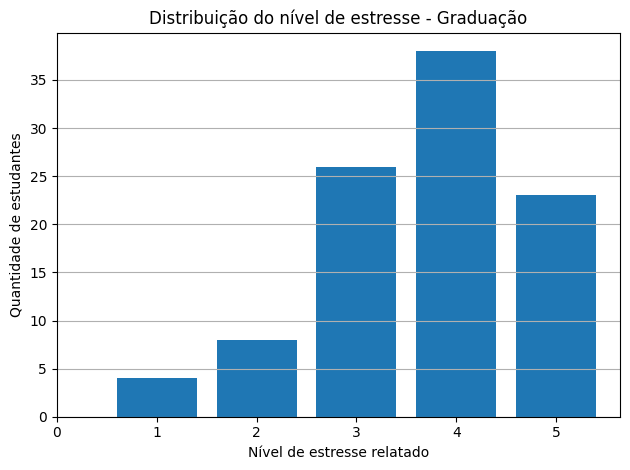

<Figure size 640x480 with 0 Axes>

In [9]:
# Seção 5.1.2.2 - undergraduate

estresse_undergraduate = df_final[df_final['academic_stage'] == 'undergraduate']['stress'].value_counts().sort_index()

# Grafico
plt.bar(estresse_undergraduate.index, estresse_undergraduate.values)

#Embelezamento do gráfico:
plt.title("Distribuição do nível de estresse - Graduação")
plt.xlabel("Nível de estresse relatado")
plt.ylabel("Quantidade de estudantes")
plt.grid(axis='y')
plt.xticks([0, 1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()
plt.clf()

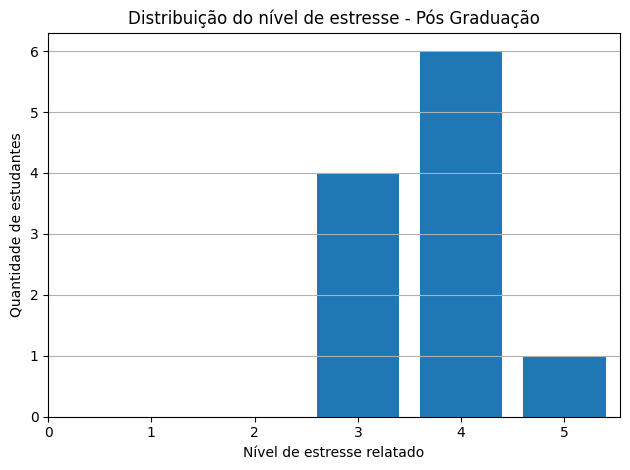

<Figure size 640x480 with 0 Axes>

In [11]:
# Seção 5.1.2.3 - post-graduate

estresse_postgraduate = df_final[df_final['academic_stage'] == 'post-graduate']['stress'].value_counts().sort_index()

# Gráfico
plt.bar(estresse_postgraduate.index, estresse_postgraduate.values)

#Embelezamento do grafico:
plt.title("Distribuição do nível de estresse - Pós Graduação")
plt.xlabel("Nível de estresse relatado")
plt.ylabel("Quantidade de estudantes")
plt.grid(axis='y')
plt.xticks([0, 1, 2, 3, 4, 5])
plt.tight_layout() 
plt.show()
plt.clf()

 ## Seção 5.1.3.1 - Gráfico geral dos 3 níveis acadêmicos

> Devido a média entre os 3 serem próximas, a visualização fica prejudicada, então criei um grafico "sem zoom", o padrão, e outro "com zoom", que na verdade só exibe uma escala menor no grafico. 



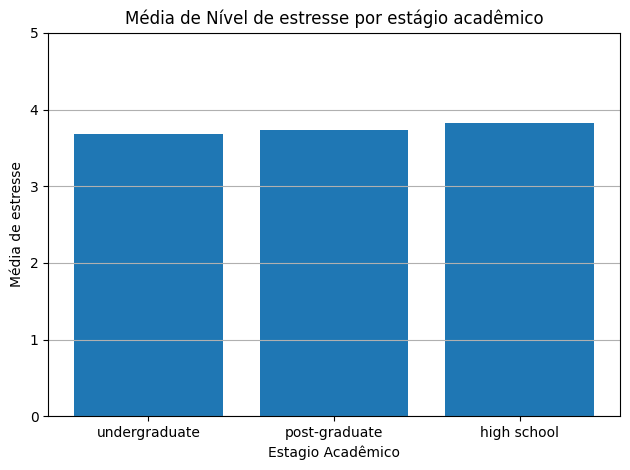

<Figure size 640x480 with 0 Axes>

In [12]:
# Seção 5.1.3.1 - Gráfico geral dos 3 níveis acadêmicos
media_estresse_niveis = df_final.groupby('academic_stage')['stress'].mean().sort_values(ascending=True)

# Seção 5.1.3.1.1 - Gráfico sem zoom
plt.bar(media_estresse_niveis.index, media_estresse_niveis.values)

#Embelezamento do gráfico:
plt.title("Média de Nível de estresse por estágio acadêmico")
plt.xlabel("Estagio Acadêmico")
plt.ylabel("Média de estresse")
plt.grid(axis='y')
plt.ylim(0, 5)
plt.tight_layout() 
plt.show()
plt.clf()

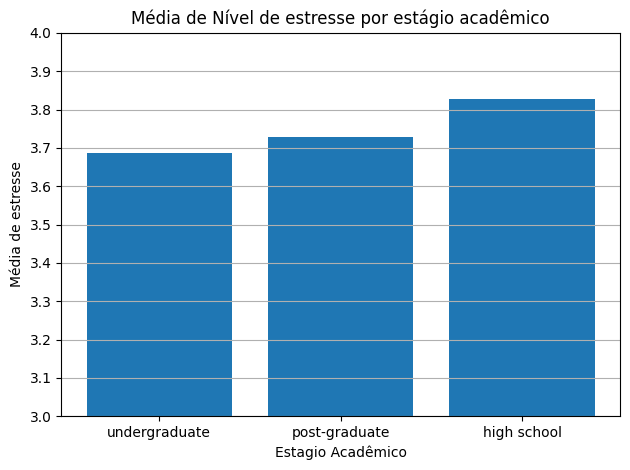

<Figure size 640x480 with 0 Axes>

In [13]:
# Seção 5.1.3.1.2 - Gráfico com zoom
plt.bar(media_estresse_niveis.index, media_estresse_niveis.values)

#Embelezamento do gráfico:
plt.title("Média de Nível de estresse por estágio acadêmico")
plt.xlabel("Estagio Acadêmico")
plt.ylabel("Média de estresse")
plt.grid(axis='y')
plt.ylim(3, 4)
plt.yticks([3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0])
plt.tight_layout() 
plt.show()
plt.clf()

## Análise 2

#### Objetivo: Avaliar se o stress acadêmico relatado tem relação com a competição acadêmica relatada.
> #### Saida esperada: Vou montar um gráfico de dispersão para analisar se há alguma relação entre os 2

Explicações do motivo dos gráficos abaixo:
* Ao utilizar o gráfico de dispersão padrão, a visualização era ruim, pois, devido a muitos pontos se sobreporem, não era possível uma optima visualização dos dados e a busca de uma correlação.
* Para encontrar uma maneira de visualização ótima, pesquisei e testei várias plotagens de gráficos, e após muitos testes acabei escolhendo um "heat map", com o kde do seaborn, junto á um grafico de dispersão do matplotlib com alguns parametros modificados. Junto á uma personalização para melhor visualização e visual mais agradavel. 



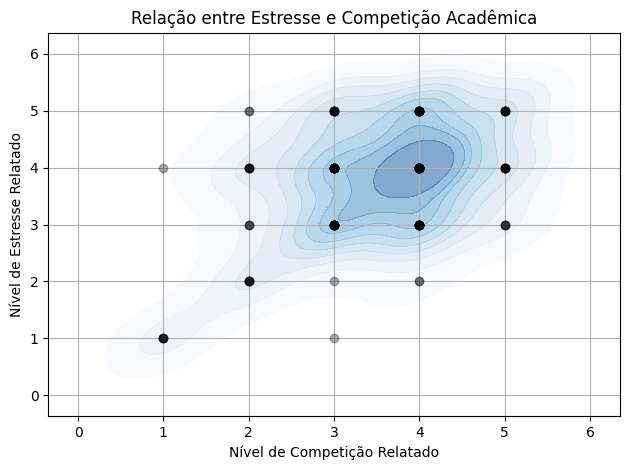

<Figure size 640x480 with 0 Axes>

In [14]:
sns.kdeplot( # O kde plot faz uma plotagem do que se parece um mapa de altitude, utilizei esse no cenário atual como um "heat map" de onde tinha mais frequência de dados.
    x=df_final['academic_competition'], #Seleciona o eixo X como a escala de competição acadêmica
    y=df_final['stress'], #Seleciona o eixo y como a escala de estresse relatado
    fill=True, #Preenche os campos, para não ficar só o contorno
    cmap="Blues", #Um estilo que achei adequado, e bonito
    alpha=0.5, #Define a transparência (Para que a sobreposição fique mais mesclada)
    levels=10, # Define a "qualidade" do gráfico, após testes, 10 é o suficiente para uma boa visualização
    zorder=1 # Define a posição do gráfico (em profundidade). Dividi em 3 levels, 0, 1, e 2)
)
plt.scatter(
    x=df_final['academic_competition'], #Mesma coisa do de cima
    y=df_final['stress'],
    color='black', # Escolhi a cor preta para uma melhor visualização
    alpha=0.3, # Novamente, a transparência para uma melhor visualização da concentração de dados
    zorder=2 # Posição entre as camadas de profundidades já previamente definidas
)

# Embelezamento
plt.title('Relação entre Estresse e Competição Acadêmica') #Defino os Títulos
plt.xlabel('Nível de Competição Relatado')
plt.ylabel('Nível de Estresse Relatado')
plt.grid(zorder=0) #Defino a camada que o grid aparece
plt.xticks([0, 1, 2, 3, 4, 5, 6]) # Os dados são de 1 a 5, mas para que a visualização fique mais centralizada no gráfico, coloquei uma posição a mais de ambos os lados
plt.yticks([0, 1, 2, 3, 4, 5, 6])
plt.tight_layout() #Ajusta o layout automaticamente
plt.show()
plt.clf()

## Seção 5.3
### Análise 3:

> #### Objetivo: Avaliar se o ambiente de estudo é diretamente relatado ao nível de estresse
> #### Saida esperado: Através disso, quero descobrir se, ambientes relatados como pacíficos são ligados á estresses relatados como baixo (1 ou 2, na escala), e se, ambientes ruins geram nivéis de estresse maiores. 


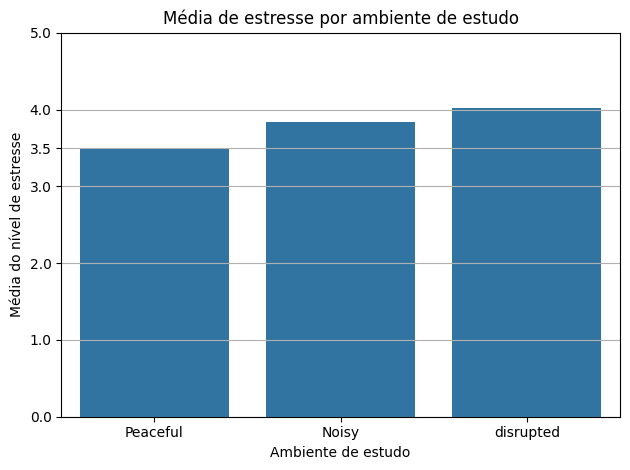

<Figure size 640x480 with 0 Axes>

In [15]:
media_estresse_ambiente = df_final.groupby('study_environment')['stress'].mean().reset_index() # Fiz a média por ambiente de estudo

# Usei o seamborn por ser mais simples nesse caso de uso

sns.barplot(x='study_environment', y='stress', data=media_estresse_ambiente, order=['Peaceful', 'Noisy', 'disrupted'])

# Embelezamento
plt.title("Média de estresse por ambiente de estudo")
plt.xlabel("Ambiente de estudo")
plt.ylabel("Média do nível de estresse")
plt.ylim(0, 5)
plt.yticks([0, 1, 2, 3, 3.5, 4, 5])
plt.grid(axis='y')
plt.tight_layout() 
plt.show()
plt.clf()

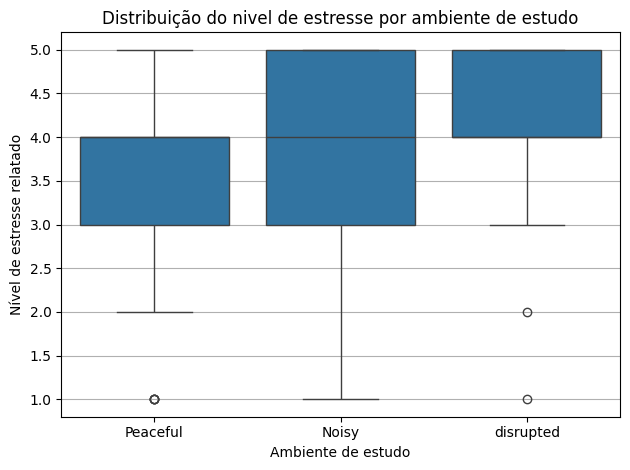

<Figure size 640x480 with 0 Axes>

In [16]:
# Segundo Gráfico, com boxplot, para demonstrar a amplitude dos dados, e a concentração, em cada um dos ambientes disponivéis

sns.boxplot(x='study_environment', y='stress', data=df_final, order=['Peaceful', 'Noisy', 'disrupted'])
plt.title('Distribuição do nivel de estresse por ambiente de estudo')
plt.xlabel('Ambiente de estudo')
plt.ylabel('Nível de estresse relatado')
plt.grid(axis='y')
plt.tight_layout() 
plt.show()
plt.clf()